In [1]:
# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Base
from collections import Counter
import re
import os

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

# Vector Representations
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [2]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [3]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [4]:
df = pd.read_csv('./final2_airbnb.csv')

df.head()

,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,description,price,price_category
0,2008-08-18,10119,Entire home/apt,1125,4,$28.00,3,Mitte,2.0,Guesthouse,strict_14_with_grace_period,1,1.0,1.0,Great location! 30 of 75 sq meters. This wood...,6.0,super cheap
1,2008-10-19,10405,Entire home/apt,1125,62,$20.00,4,Prenzlauer Berg,2.0,Apartment,strict_14_with_grace_period,2,1.0,1.0,This beautiful first floor apartment is situa...,9.0,super cheap
2,2009-08-25,10405,Entire home/apt,14,6,$10.00,7,Prenzlauer Berg,7.0,Apartment,strict_14_with_grace_period,5,4.0,2.5,4 bedroom with very large windows and outstand...,18.0,cheap
3,2009-11-18,10437,Entire home/apt,1125,90,$0.00,2,Prenzlauer Berg,1.0,Apartment,strict_14_with_grace_period,1,0.0,1.0,The apartment is located on the upper second f...,7.0,super cheap
4,2009-12-03,10245,Private room,52,30,$13.00,2,Friedrichshain,2.0,Apartment,strict_14_with_grace_period,1,1.0,1.0,Hello future guests! We want to rent our cute ...,12.0,cheap


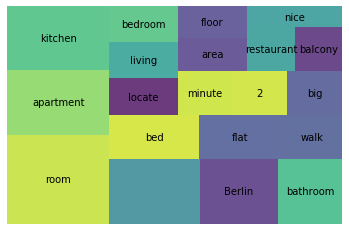

In [5]:
df['lemmas'] = df['description'].apply(get_lemmas)

wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Super Cheap

In [6]:
super_cheap = df.loc[df['price_category'] == 'super cheap']
print(super_cheap.shape)
super_cheap.head()

(3041, 18)


,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,description,price,price_category,lemmas
0,2008-08-18,10119,Entire home/apt,1125,4,$28.00,3,Mitte,2.0,Guesthouse,strict_14_with_grace_period,1,1.0,1.0,Great location! 30 of 75 sq meters. This wood...,6.0,super cheap,"[great, location, , 30, 75, sq, meter, wood, ..."
1,2008-10-19,10405,Entire home/apt,1125,62,$20.00,4,Prenzlauer Berg,2.0,Apartment,strict_14_with_grace_period,2,1.0,1.0,This beautiful first floor apartment is situa...,9.0,super cheap,"[beautiful, floor, apartment, , situate, , K..."
3,2009-11-18,10437,Entire home/apt,1125,90,$0.00,2,Prenzlauer Berg,1.0,Apartment,strict_14_with_grace_period,1,0.0,1.0,The apartment is located on the upper second f...,7.0,super cheap,"[apartment, locate, upper, second, floor, typi..."
5,2009-12-20,10997,Entire home/apt,365,60,$20.00,5,Kreuzberg,3.0,Apartment,strict_14_with_grace_period,2,1.0,1.0,Light and sunny 2-Room-turn of the century-fla...,9.0,super cheap,"[light, sunny, 2-room, turn, century, flat, ty..."
9,2009-12-20,10997,Entire home/apt,365,60,$18.00,4,Kreuzberg,2.0,Apartment,strict_14_with_grace_period,2,1.0,1.0,Light and sunny 1-Room-turn of the century-fla...,7.0,super cheap,"[light, sunny, 1-room, turn, century, flat, ty..."


C:\Users\anika\Anaconda3\envs\DSML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


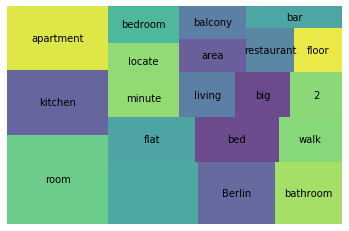

In [7]:
super_cheap['lemmas'] = super_cheap['description'].apply(get_lemmas)

wc = count(super_cheap['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Cheap

In [8]:
cheap = df.loc[df['price_category'] == 'cheap']
print(cheap.shape)
cheap.head()

(1464, 18)


,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,description,price,price_category,lemmas
2,2009-08-25,10405,Entire home/apt,14,6,$10.00,7,Prenzlauer Berg,7.0,Apartment,strict_14_with_grace_period,5,4.0,2.5,4 bedroom with very large windows and outstand...,18.0,cheap,"[4, bedroom, large, window, outstanding, view,..."
4,2009-12-03,10245,Private room,52,30,$13.00,2,Friedrichshain,2.0,Apartment,strict_14_with_grace_period,1,1.0,1.0,Hello future guests! We want to rent our cute ...,12.0,cheap,"[hello, future, guest, want, rent, cute, truly..."
17,2009-11-14,10437,Entire home/apt,365,60,$0.00,4,Prenzlauer Berg,3.0,Apartment,strict_14_with_grace_period,2,2.0,1.0,This charming apartment located in a building ...,13.0,cheap,"[charming, apartment, locate, building, build,..."
25,2010-08-31,10405,Entire home/apt,60,3,$0.00,6,Prenzlauer Berg,3.0,Apartment,strict_14_with_grace_period,1,2.0,2.0,We are subletting our beautiful 150 sqm apartm...,16.0,cheap,"[sublet, beautiful, 150, sqm, apartment, ideal..."
33,2010-11-08,10405,Entire home/apt,50,5,$15.00,4,Prenzlauer Berg,3.0,Apartment,strict_14_with_grace_period,1,2.0,1.5,We offer our 4 room apartment in Prenzlauer Be...,13.0,cheap,"[offer, 4, room, apartment, Prenzlauer, Berg, ..."


C:\Users\anika\Anaconda3\envs\DSML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


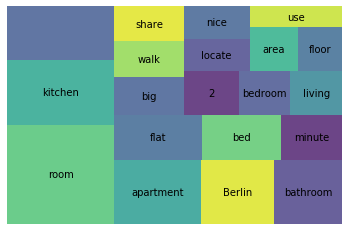

In [9]:
cheap['lemmas'] = cheap['description'].apply(get_lemmas)

wc = count(cheap['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Low

In [10]:
low = df.loc[df['price_category'] == 'low']
print(low.shape)
low.head()

(2678, 18)


,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,description,price,price_category,lemmas
6,2010-01-04,10405,Private room,30,3,$26.00,2,Prenzlauer Berg,1.0,Condominium,strict_14_with_grace_period,1,1.0,1.0,The 25 sqm room is located in the heart of Ber...,45.0,low,"[25, sqm, room, locate, heart, Berlin, private..."
7,2010-01-08,12047,Entire home/apt,90,5,$15.00,2,Neukölln,1.0,Apartment,strict_14_with_grace_period,1,1.0,1.0,- beautiful studio apt in downtown Berlin - br...,49.0,low,"[beautiful, studio, apt, downtown, Berlin, bri..."
22,2010-07-24,10435,Private room,7,2,$13.00,2,Prenzlauer Berg,1.0,Apartment,moderate,1,1.0,1.0,"Nice and big room with a balcony, wodden floor...",43.0,low,"[nice, big, room, balcony, wodden, floor, high..."
23,2010-10-27,10997,Private room,730,1,$19.00,3,Kreuzberg,1.0,Apartment,flexible,1,1.0,1.5,Spacious 35 square metre room in shared apartm...,36.0,low,"[spacious, 35, square, metre, room, share, apa..."
24,2010-08-06,12435,Private room,30,3,$10.00,2,Alt-Treptow,1.0,Apartment,moderate,2,1.0,1.0,"One room in a spacious, sunny luxury two-room ...",42.0,low,"[room, spacious, sunny, luxury, room, apartmen..."


C:\Users\anika\Anaconda3\envs\DSML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


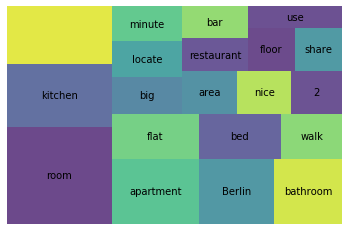

In [11]:
low['lemmas'] = low['description'].apply(get_lemmas)

wc = count(low['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Medium

In [12]:
medium = df.loc[df['price_category'] == 'medium']
print(medium.shape)
medium.head()

(2019, 18)


,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,description,price,price_category,lemmas
10,2010-02-27,10999,Entire home/apt,30,3,$25.00,4,Kreuzberg,2.0,Apartment,strict_14_with_grace_period,2,2.0,1.0,Very nice furnished 2 bedroom apartment for su...,98.0,medium,"[nice, furnished, 2, bedroom, apartment, suble..."
11,2010-03-17,10965,Entire home/apt,180,60,$0.00,4,Kreuzberg,4.0,Condominium,strict_14_with_grace_period,1,1.0,1.0,Beautiful and calm apartment in close vicinity...,65.0,medium,"[beautiful, calm, apartment, close, vicinity, ..."
18,2010-06-12,10557,Entire home/apt,1125,3,$8.00,4,Moabit,2.0,Apartment,strict_14_with_grace_period,2,1.0,1.0,"Welcome in our nice apartment: airy bedroom, g...",62.0,medium,"[welcome, nice, apartment, airy, bedroom, grea..."
19,2010-06-27,10437,Entire home/apt,75,60,$10.00,2,Moabit,1.0,Apartment,strict_14_with_grace_period,1,1.0,1.0,Dear Guests - Welcome to Berlin! very nice and...,55.0,medium,"[dear, guest, Welcome, Berlin, nice, modern, D..."
20,2010-06-21,10435,Entire home/apt,1125,2,$12.00,2,Mitte,2.0,Apartment,strict_14_with_grace_period,1,1.0,1.0,"Central, quiet, bright and ample in a beautifu...",52.0,medium,"[central, quiet, bright, ample, beautiful, Ber..."


C:\Users\anika\Anaconda3\envs\DSML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


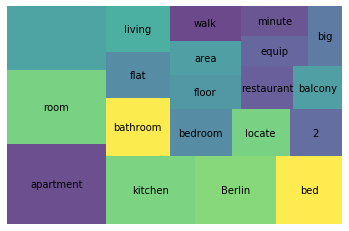

In [13]:
medium['lemmas'] = medium['description'].apply(get_lemmas)

wc = count(medium['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## High

In [14]:
high = df.loc[df['price_category'] == 'high']
print(high.shape)
high.head()

(411, 18)


,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,description,price,price_category,lemmas
8,2010-01-18,10435,Entire home/apt,30,3,$24.00,4,Prenzlauer Berg,2.0,Loft,strict_14_with_grace_period,2,2.0,1.0,Bright and sunny condo with two balconies in a...,129.0,high,"[bright, sunny, condo, balcony, stunning, loca..."
14,2010-04-23,10437,Entire home/apt,1125,3,$40.00,8,Prenzlauer Berg,8.0,Apartment,strict_14_with_grace_period,4,2.0,2.0,This flat has permission to rent under Licence...,197.0,high,"[flat, permission, rent, Licence, Nr, 03, z, z..."
40,2011-02-15,10435,Entire home/apt,360,4,$25.00,6,Prenzlauer Berg,6.0,Apartment,strict_14_with_grace_period,4,3.0,1.0,"This attractive apartment comprises of 101m2, ...",185.0,high,"[attractive, apartment, comprise, 101m2, fully..."
42,2010-09-30,10117,Entire home/apt,28,4,$25.00,5,Mitte,3.0,Apartment,strict_14_with_grace_period,2,2.0,1.0,"Our 2 bedroom, large living room and huge live...",155.0,high,"[2, bedroom, large, living, room, huge, live, ..."
56,2011-05-22,10247,Entire home/apt,13,7,$10.00,4,Friedrichshain,2.0,Apartment,moderate,2,1.0,1.0,fully furnished flat for rent in berlin friedr...,125.0,high,"[fully, furnish, flat, rent, berlin, friedrich..."


C:\Users\anika\Anaconda3\envs\DSML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


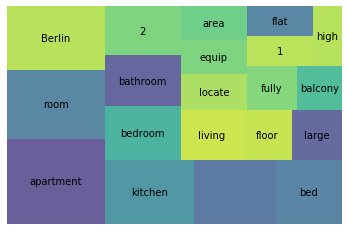

In [15]:
high['lemmas'] = high['description'].apply(get_lemmas)

wc = count(high['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Expensive

In [16]:
expensive = df.loc[df['price_category'] == 'expensive']
print(expensive.shape)
expensive.head()

(5, 18)


,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,description,price,price_category,lemmas
49,2010-02-27,10967,Entire home/apt,1125,3,$45.00,14,Kreuzberg,10.0,Apartment,strict_14_with_grace_period,8,5.0,2.0,Storage Berlin - Contemporary and innovative l...,506.0,expensive,"[storage, Berlin, contemporary, innovative, lo..."
2922,2012-03-30,10435,Entire home/apt,1125,3,$50.00,6,Mitte,4.0,Loft,strict_14_with_grace_period,4,3.0,2.0,Beautiful sunny penthouse in best area! The pe...,595.0,expensive,"[beautiful, sunny, penthouse, good, area, pent..."
3612,2016-01-17,10117,Private room,1125,1,$0.00,16,Mitte,16.0,Hostel,strict_14_with_grace_period,1,8.0,4.0,"In the heart of Berlin, a 7-minute walk from t...",899.0,expensive,"[heart, Berlin, 7-minute, walk, Brandenburg, G..."
6936,2016-01-17,10963,Shared room,1125,1,$20.00,8,Kreuzberg,6.0,Hostel,moderate,8,1.0,2.0,Stay in the heart of Berlin – Great location R...,599.0,expensive,"[stay, heart, Berlin, great, location, renovat..."
7807,2016-11-08,10963,Entire home/apt,180,3,$0.00,5,Potsdamer Platz,2.0,Serviced apartment,super_strict_30,1,2.0,2.0,The Dessauer.7 apartment radiates a very speci...,505.0,expensive,"[Dessauer.7, apartment, radiate, special, char..."


C:\Users\anika\Anaconda3\envs\DSML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


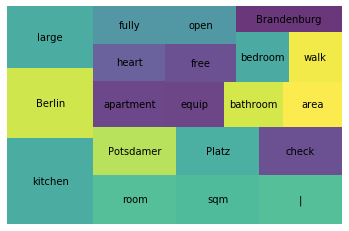

In [17]:
expensive['lemmas'] = expensive['description'].apply(get_lemmas)

wc = count(expensive['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Very Expensive

In [18]:
very_expensive = df.loc[df['price_category'] == 'very expensive']
print(very_expensive.shape)
very_expensive.head()

(2, 18)


,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,description,price,price_category,lemmas
2252,2012-11-27,10435,Private room,1125,1,$10.00,2,Prenzlauer Berg,1.0,Apartment,flexible,1,1.0,1.0,Dear travellers - I'm renting out a 12 sq mete...,2225.0,very expensive,"[dear, traveller, rent, 12, sq, meter, room, u..."
6311,2016-11-08,10178,Entire home/apt,60,2,$0.00,6,Mitte,3.0,Serviced apartment,strict_14_with_grace_period,4,3.0,3.5,5 stars plus penthouse combined with great var...,1875.0,very expensive,"[5, star, plus, penthouse, combine, great, var..."


C:\Users\anika\Anaconda3\envs\DSML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


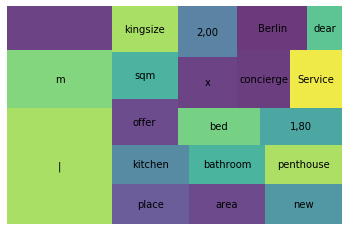

In [19]:
very_expensive['lemmas'] = very_expensive['description'].apply(get_lemmas)

wc = count(very_expensive['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()